**Word Cloud - 'The Simpsons'**<br/>
**Link:** https://www.kaggle.com/datasets/feniksm/simpsons?resource=download<br/>
**Original:** https://data.world/data-society/the-simpsons-by-the-data<br/>
**Código elaborado por:** Nathália Santiago<br/>

In [1]:
import numpy as np # para arrays e matrizes
import pandas as pd # análise de dados
from os import path
from PIL import Image # coleta imagens diferentes
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # para gerar a word cloud

import matplotlib.pyplot as plt # visualização de dados
% matplotlib inline

In [2]:
# O dataset das script_lines foi dividios para inserirno github, depois de importsado, fiz a concatenação.
url1 = "https://raw.githubusercontent.com/santiago-nath/Kaggle_WordCloud_Simpsons/main/script_lines2.csv"

In [3]:
df_script1 = pd.read_csv(url1) 

In [4]:
url2 = "https://raw.githubusercontent.com/santiago-nath/Kaggle_WordCloud_Simpsons/main/script_lines3.csv"

In [5]:
df_script2 = pd.read_csv(url2)

In [6]:
scripts = [df_script1, df_script2]

In [7]:
df_script = pd.concat(scripts)

In [8]:
#Linhas x colunas do dataframe
df_script.shape

(158266, 13)

In [9]:
# Verificando valores nulos
df_script.isna().sum()

id                        0
episode_id                0
number                    0
raw_text                  0
timestamp_in_ms           0
speaking_line             0
character_id          17526
location_id             407
raw_character_text    17526
raw_location_text       407
spoken_words          26163
normalized_text       26188
word_count            26163
dtype: int64

In [10]:
# Informações das colunas
df_script.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158266 entries, 0 to 84636
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  158266 non-null  int64  
 1   episode_id          158266 non-null  int64  
 2   number              158266 non-null  int64  
 3   raw_text            158266 non-null  object 
 4   timestamp_in_ms     158266 non-null  int64  
 5   speaking_line       158266 non-null  bool   
 6   character_id        140740 non-null  float64
 7   location_id         157859 non-null  float64
 8   raw_character_text  140740 non-null  object 
 9   raw_location_text   157859 non-null  object 
 10  spoken_words        132103 non-null  object 
 11  normalized_text     132078 non-null  object 
 12  word_count          132103 non-null  float64
dtypes: bool(1), float64(3), int64(4), object(5)
memory usage: 15.8+ MB


In [11]:
# Primeiras 20 linhas do dataframe
df_script.head(5)

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,86263,298,245,"Seymour Skinner: I'm sorry, everyone. I perpet...",1153000,True,3.0,4.0,Seymour Skinner,Auditorium,"I'm sorry, everyone. I perpetrated this charad...",im sorry everyone i perpetrated this charade t...,34.0
1,86264,298,246,Audience: Awwww...,1165000,True,321.0,4.0,Audience,Auditorium,Awwww...,awwww,1.0
2,86265,298,247,Agnes Skinner: Seymour! Your feelings are ugly...,1167000,True,192.0,4.0,Agnes Skinner,Auditorium,Seymour! Your feelings are ugly and wrong!,seymour your feelings are ugly and wrong,7.0
3,86266,298,248,Little Richard: Are you gonna listen to her?,1171000,True,3745.0,4.0,Little Richard,Auditorium,Are you gonna listen to her?,are you gonna listen to her,6.0
4,86267,298,249,"Seymour Skinner: Not on your life, Reverend. F...",1173000,True,3.0,4.0,Seymour Skinner,Auditorium,"Not on your life, Reverend. From now on, I'm m...",not on your life reverend from now on im my ow...,12.0


In [12]:
# Optei por retirar as linhas identificadas como 'falsas' que também eram as indicadas com outras colunas como 'Nan'.
df_script.drop(df_script[df_script['speaking_line'] == False].index, inplace = True)

In [13]:
df_script.isna().sum()

id                      0
episode_id              0
number                  0
raw_text                0
timestamp_in_ms         0
speaking_line           0
character_id            2
location_id           312
raw_character_text      2
raw_location_text     312
spoken_words            0
normalized_text        21
word_count              0
dtype: int64

In [14]:
df_script['character_id']= df_script['character_id'].replace(np.nan,999)

In [15]:
df_script['raw_character_text']= df_script['raw_character_text'].replace(np.nan,'Nobody Knows')

In [16]:
df_script['location_id']= df_script['location_id'].replace(np.nan,999)

In [17]:
df_script['raw_location_text']= df_script['raw_location_text'].replace(np.nan,'Nobody Knows Where')

In [18]:
df_script['normalized_text']= df_script['normalized_text'].replace(np.nan,'Non Id')

In [19]:
df_script.isna().sum()

id                    0
episode_id            0
number                0
raw_text              0
timestamp_in_ms       0
speaking_line         0
character_id          0
location_id           0
raw_character_text    0
raw_location_text     0
spoken_words          0
normalized_text       0
word_count            0
dtype: int64

In [20]:
df_script.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111748 entries, 0 to 84636
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  111748 non-null  int64  
 1   episode_id          111748 non-null  int64  
 2   number              111748 non-null  int64  
 3   raw_text            111748 non-null  object 
 4   timestamp_in_ms     111748 non-null  int64  
 5   speaking_line       111748 non-null  bool   
 6   character_id        111748 non-null  float64
 7   location_id         111748 non-null  float64
 8   raw_character_text  111748 non-null  object 
 9   raw_location_text   111748 non-null  object 
 10  spoken_words        111748 non-null  object 
 11  normalized_text     111748 non-null  object 
 12  word_count          111748 non-null  float64
dtypes: bool(1), float64(3), int64(4), object(5)
memory usage: 11.2+ MB


In [21]:
#Verficando quantos personagens tem no dataset
characters = df_script["raw_character_text"].unique()
print(characters)

['Seymour Skinner' 'Audience' 'Little Richard' ...
 'Maniacal-looking Teacher' "Skinner's Thoughts" "Mrs. Skinner's Thoughts"]


In [22]:
#Verficando quantas localizações tem no dataset
locations = df_script["raw_location_text"].unique()
print(locations)

['Auditorium' 'EFCOT Center' 'Simpson Home' ... 'FUTURE SPHERE'
 'Home of Tomorrow' 'Vietnam']


In [23]:
# Extraindo do dataframe o texto (personagens identificados) para colocar na nuvem
text=(' '.join(df_script['raw_character_text']))

In [24]:
#wordcloud(): Cria e gera a imagem da Word Cloud
#.generate: método que contém o argumento 'text' - que são as palavras da nuvem
#collocation: False - para garantir que não duplique palavras ou seja considerado bigramas

wordcloud = WordCloud(colormap='Set2',collocations=False,).generate(text)

(-0.5, 399.5, 199.5, -0.5)

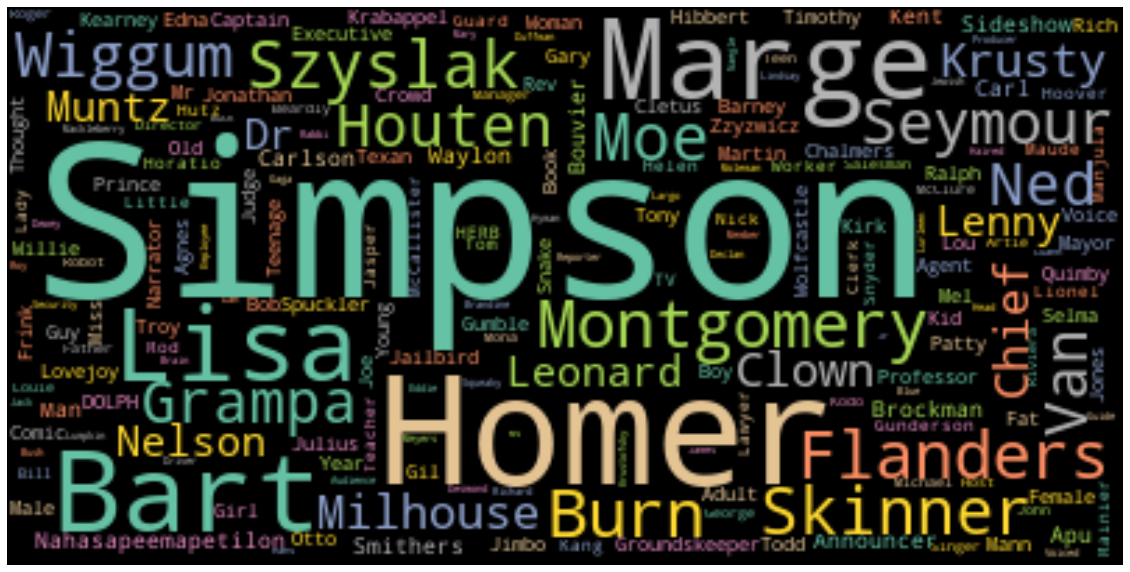

In [25]:
# Cria o gráfico da Word Cloud
# imshow(): função que apresenta a imagem
# interpolation=”bilinear”: suaviza a imagem

plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [26]:
# Extraindo do dataframe as localizações identificadas para colocar na nuvem
loc=(' '.join(df_script['raw_location_text']))

In [27]:
wordcloud = WordCloud(max_font_size=50, max_words=300, background_color="white",collocations=False).generate(loc)

(-0.5, 399.5, 199.5, -0.5)

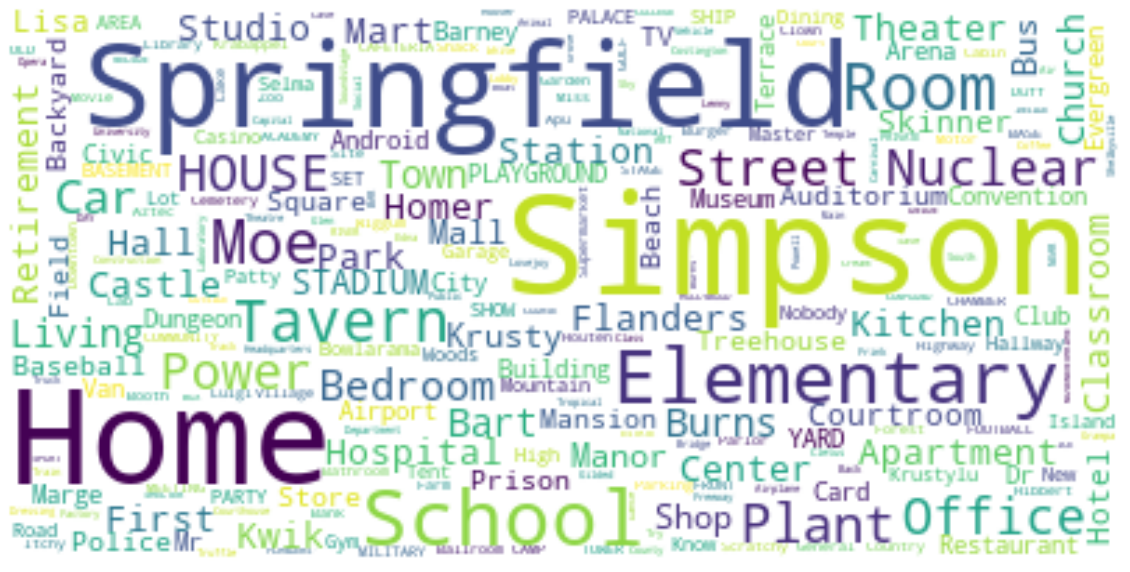

In [28]:
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [29]:
# Criar uma word cloud com máscara de imagem selecionada = 'LISA'
stopwords = set(STOPWORDS)

In [31]:
mask = np.array(Image.open("/content/lisa.jpg"))

In [36]:
# As falas de todos os personagens do dataset foram consideradas
wordcloud = WordCloud(stopwords=stopwords, background_color='white',
                      max_words= 5000, mask= mask, contour_color='#023075',
                      contour_width=1, colormap='rainbow').generate(' '.join(df_script['normalized_text']))

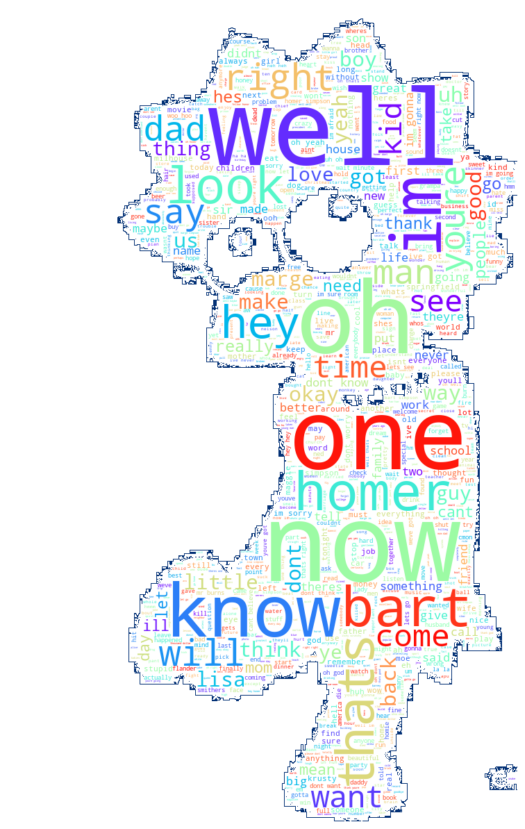

In [38]:
#criando imagem
plt.figure(figsize=[15,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

# salva imagem
plt.savefig("cloud.png", format="png")
plt.show()

In [49]:
#Somente falas da Lisa
df_lisa = df_script.loc[df_script['raw_character_text'] == 'Lisa']

In [50]:
df_lisa.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
34675,29262,99,198,Lisa: As am I.,1081000,True,1428.0,1043.0,Lisa,BASEMENT ROOM,As am I.,as am i,3.0
54893,50029,177,166,"""Lisa"": (TALK SONG) I'M LISA -- PEPPY, BLONDE,...",1001000,True,1428.0,1640.0,Lisa,VARIETY SHOW SOUND STAGE,"I'M LISA -- PEPPY, BLONDE, AND STUNNING! / SOP...",im lisa -- peppy blonde and stunning sophomore...,15.0
54895,50031,177,168,Lisa: (POINTING) Here he is!,1019000,True,1428.0,1640.0,Lisa,VARIETY SHOW SOUND STAGE,Here he is!,here he is,3.0
54916,50053,177,190,"""Lisa"": Look everybody, Maggie got her first t...",1109000,True,1428.0,1640.0,Lisa,VARIETY SHOW SOUND STAGE,"Look everybody, Maggie got her first tooth!",look everybody maggie got her first tooth,7.0
54935,50072,177,209,Lisa: (SINGING) I WANT CANDY!,1179000,True,1428.0,1641.0,Lisa,50'S ICE CREAM PARLOR,I WANT CANDY!,i want candy,3.0


In [61]:
lisa = loc=(' '.join(df_lisa['spoken_words']))

In [64]:
wordcloud = WordCloud(stopwords=stopwords, background_color='white',
                      max_words= 5000, contour_color='#023075',
                      contour_width=1, colormap='rainbow').generate(lisa)

(-0.5, 399.5, 199.5, -0.5)

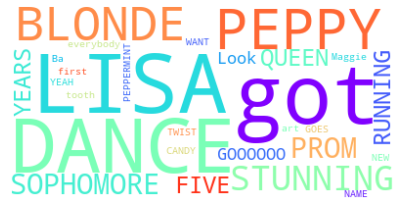

In [65]:
#criando imagem
plt.figure(figsize=[7,7])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

In [67]:
wordcloud_lisa = WordCloud(stopwords=stopwords, background_color='white',
                      max_words= 5000, mask=mask, contour_color='#023075',
                      contour_width=1, colormap='rainbow').generate(lisa)

(-0.5, 735.5, 1174.5, -0.5)

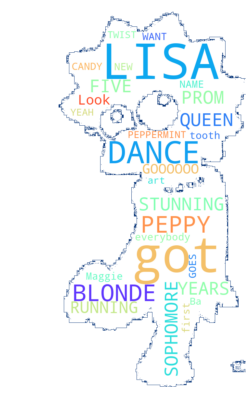

In [68]:
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_lisa, interpolation="bilinear")
plt.axis("off")